# Web Data Extraction/ Web Scraping Report

<b>Rishabh Kaushick</b> <br>
College of Engineering <br>
Northeastern University <br>
Toronto, ON <br>
kaushick.r@northeastern.edu

## Importing Libraries

In [1]:
# Importing the libraries
import requests
from bs4 import BeautifulSoup

import bs4
import pandas as pd
import time

## Inspecting Elements In the Web Page

Firstly, let us try to get the elements from the webpage using Python code. For this we can use the requests library to create a GET request as the following:

In [23]:
URL_HOME_PAGE = 'https://carsandbids.com'

In [3]:
# Let us try to send a HTTP GET request to the same website:
home_page = requests.get(URL_HOME_PAGE)

In [9]:
home_page.status_code

200

We can see that the HTTP GET request has received a 200: OK response. Let us try to parse this HTML and see the content.

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,maximum-scale=1,shrink-to-fit=no" name="viewport"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="Cars &amp; Bids" name="apple-mobile-web-app-title"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/apple-touch-icon-76.png" rel="apple-touch-icon"/>
  <link href="/apple-touch-icon-76.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/apple-touch-icon-120.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/apple-touch-icon-152.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="https://connect.facebook.net" rel="preconnect"/>
  <link href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://www.googletagmanager.com" rel="preconnect"/>
  <meta content="max-image-preview:large" name="robots"/>
  <meta content="Cars &amp; Bids has daily auctions of cool enthusiast vehicles from the 1980s to t
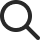

In [4]:
# Using BeautifulSoup, we can parse the HTML webpage.
soup = BeautifulSoup(home_page.text, "html.parser")
# Print the website soup in a better format
print(soup.prettify())

Based on the above response to the GET request, we can see that it says, "You need to enable JavaScript to run this app."
Let us try to run this through the Selenium library - which is a web automation testing software.

In [6]:
# Importing required libraries for selenium:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

TIMEOUT = 5

# Setting the options so that the webpage is maximised and rid of irrelevant content like notifications, popups etc.
options = Options()
options.add_argument("--start-maximized")
options.add_argument("--disable-notifications")
options.add_argument("--disable-popup-blocking")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_experimental_option("prefs", 
                                {"profile.default_content_setting_values.notifications": 2 
                                }) 

Let us now try to retrieve the webpage:

In [11]:
print(f"Retrieving web page URL '{URL_HOME_PAGE}'")
driver = webdriver.Chrome(
    options=options)
driver.get(URL_HOME_PAGE)

# Timeout needed for Web page to render
time.sleep(TIMEOUT)

# Storing the HTML content of the home page
home_page_html = driver.page_source

# Get the source of the page and create a BeautifulSoup object
home_page_soup = BeautifulSoup(home_page_html, 'html.parser')

driver.quit()

Retrieving web page URL 'https://carsandbids.com/'


Let us inspect the webpage and navigate to the elements which contains the tile of the car and locate the link. We can see the div tag with class = “auction-title” is the tag in which there is the a tag containing the link.

In [27]:
# Retrieving the div elements with the class as “auction-title”
car_title_elements = home_page_soup.find_all("div", class_="auction-title")
car_title_elements

[<div class="auction-title"><a href="/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe" title="2022 Ford Mustang Shelby GT-H Coupe">2022 Ford Mustang Shelby GT-H Coupe</a><button class="toggle-watch" type="button"><span class="sr-only">Watch</span></button></div>,
 <div class="auction-title"><a href="/auctions/9eYyqMzN/1998-toyota-hilux-surf-ssr-x-wide-27-4x4" title="1998 Toyota Hilux Surf SSR-X Wide 2.7 4x4">1998 Toyota Hilux Surf SSR-X Wide 2.7 4x4</a><button class="toggle-watch" type="button"><span class="sr-only">Watch</span></button></div>,
 <div class="auction-title"><a href="/auctions/KDbdMZV0/2011-bmw-m3-coupe" title="2011 BMW M3 Coupe">2011 BMW M3 Coupe</a><button class="toggle-watch" type="button"><span class="sr-only">Watch</span></button></div>,
 <div class="auction-title"><a href="/auctions/3LnYjm8y/2003-honda-s2000" title="2003 Honda S2000">2003 Honda S2000</a><button class="toggle-watch" type="button"><span class="sr-only">Watch</span></button></div>,
 <div class="a

In [28]:
len(car_title_elements)

107

From the above, we can see that we have retrieved 107 cars directly from the home page.

In [29]:
car_title_elements[0].get_text()

'2022 Ford Mustang Shelby GT-H CoupeWatch'

In [30]:
# Now let us try to get the <a> tag and retrieve the link:
print(car_title_elements[0].find('a').get('href'))

/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe


We can see that the link is relative. In order to visit the website with the car details we need to append this with the URL_HOME_PAGE (https://carsandbids.com). Therefore the link to this car is ‘https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe’.

In [25]:
# Extracting the car title URLs and storing them in a list
# As seen above, each link must be appended with the URL_HOME_PAGE
car_links = []
car_links = [URL_HOME_PAGE+car_titile.find('a').get('href').strip() for car_titile in car_title_elements]
print(car_links)

['https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe', 'https://carsandbids.com/auctions/9eYyqMzN/1998-toyota-hilux-surf-ssr-x-wide-27-4x4', 'https://carsandbids.com/auctions/KDbdMZV0/2011-bmw-m3-coupe', 'https://carsandbids.com/auctions/3LnYjm8y/2003-honda-s2000', 'https://carsandbids.com/auctions/364EvAbA/2009-infiniti-g37-convertible-sport', 'https://carsandbids.com/auctions/30w2yPyg/1992-bmw-525tds-sedan', 'https://carsandbids.com/auctions/KDZRnoZE/2023-rivian-r1s-adventure-edition', 'https://carsandbids.com/auctions/rJJkNRzw/2011-volkswagen-gti', 'https://carsandbids.com/auctions/r4d0Mq5V/2021-chevrolet-camaro-zl1-coupe', 'https://carsandbids.com/auctions/KPeag4L7/2006-bmw-330ci-zhp-convertible', 'https://carsandbids.com/auctions/9lZ0BedN/2004-nissan-350z-touring-coupe', 'https://carsandbids.com/auctions/9QPJ116n/2011-cadillac-cts-v-sedan', 'https://carsandbids.com/auctions/KV4pmY1Y/1998-mazda-roadster', 'https://carsandbids.com/auctions/KDVdJONM/1993-to

In [31]:
len(car_links)

107

## Defining A Function to Get BeautifulSoup Object From a Link

In [33]:
def get_soup(url):
    TIMEOUT = 5
    
    # Setting the options so that the webpage is maximised and rid of irrelevant content like notifications, popups etc.
    options = Options()
    options.add_argument("--start-maximized")
    options.add_argument("--disable-notifications")
    options.add_argument("--disable-popup-blocking")
    options.add_argument("--disable-infobars")
    options.add_argument("--disable-extensions")
    options.add_experimental_option("prefs", 
                                    {"profile.default_content_setting_values.notifications": 2 
                                    })
    
    print(f"Retrieving web page URL '{url}'")
    driver = webdriver.Chrome(
        options=options)
    driver.get(url)

    # Timeout needed for Web page to render
    time.sleep(TIMEOUT)

    # Storing the HTML content of the home page
    html = driver.page_source

    # Get the source of the page and create a BeautifulSoup object
    soup = BeautifulSoup(html, 'html.parser')

    driver.quit()
    return soup


## Defining A Function to Retrieve Car Links from Home Page

In [32]:
def get_car_urls(soup):
    car_title_elements = soup.find_all("div", class_="auction-title")
    car_links = []
    car_links = [URL_HOME_PAGE+car_titile.find('a').get('href').strip() for car_titile in car_title_elements]
    return car_links

## Getting Data from the Car Page

Now that we have all the links, we will visit each of these websites, and retrieve all the information about these cars. Let us take the example of the first car – ‘2022 Ford Mustang Shelby GT-H CoupeWatch’ (https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe)

We can see that most of the details are in the div class="quick-facts". Here we have the details such as the make, model, engine, and many more details. Let us try to get individual relevant details from here.

In [34]:
car_page_url = 'https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe'

# we can utlize before created function to get the car_page_soup
car_page_soup = get_soup(url=car_page_url)

Retrieving web page URL 'https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe'


In [37]:
quick_facts_element = car_page_soup.find_all('div', class_="quick-facts")
print(quick_facts_element)

[<div class="quick-facts"><dl><dt>Make</dt><dd><a href="/search/ford">Ford</a></dd><dt>Model</dt><dd class="subscribeable"><a href="/search/ford/mustang">Mustang</a><button class="rb subscribe" title="Notify me of Mustangs" type="button"><span class="sr-only">Save</span></button></dd><dt>Mileage</dt><dd class="wrappable">750</dd><dt>VIN</dt><dd>1FA6P8CF5N5116542</dd><dt>Title Status</dt><dd class="wrappable">Clean (AZ)</dd><dt>Location</dt><dd class="wrappable"><a href="https://www.google.com/maps/place/Estero,%20FL%2033928/" rel="noopener noreferrer" target="_blank">Estero, FL 33928</a></dd><dt>Seller</dt><dd class="seller"><div class="username"><div class="photo float-left"><a class="usericon" href="/user/Hertz_Collectible_Cars" title="Hertz_Collectible_Cars"><img alt="Hertz_Collectible_Cars" src="https://media-r2.carsandbids.com/cdn-cgi/image/width=60,height=60,quality=70/f1b76c9c65811373ecff976ba8595fc03ebdc2e0/photos/3gQVpv0G-o_kprQTXG.jpg"/></a></div><div class="text"><span class

In [47]:
# We can get the titles from the 'dt' tag:
quick_facts_element[0].find_all('dt')
keys = [ key.get_text() for key in quick_facts_element[0].find_all('dt')]
print(keys)

['Make', 'Model', 'Mileage', 'VIN', 'Title Status', 'Location', 'Seller', 'Engine', 'Drivetrain', 'Transmission', 'Body Style', 'Exterior Color', 'Interior Color', 'Seller Type']


In [48]:
# We can get the actual data of these from the dd
quick_facts_element[0].find_all('dd')[0].get_text()
values = []
values = [fact.get_text() for fact in quick_facts_element[0].find_all('dd')]
print(values)

['Ford', 'MustangSave', '750', '1FA6P8CF5N5116542', 'Clean (AZ)', 'Estero, FL 33928', 'Hertz_Collectible_CarsContact', '5.0L Supercharged V8', 'Rear-wheel drive', 'Automatic (10-Speed)', 'Coupe', 'Rapid Red Metallic', 'Ebony', 'Private Party']


From the above, all the data looks like it is coming correctly, except for the car model. In the model, there is a bell icon next to the text which has the value save - therefore, we are getting the result as 'MustangSave'. However, the correct data is 'Mustang'. Similarly, the Seller is 'Hertz_Collectible_Cars' but the value is coming as 'Hertz_Collectible_CarsContact'. Therefore, let us remove the value 'Save' from the Model column and remove the 'Contact' from the Seller column.

In [55]:
# In the code below, I am looping through all the 'dd' tags in the quick_facts_element  
# if index is 1 (2nd item) then I specifically get the text from the <a> tag - which will have only the Model
# if index is 6 (7th item) then I specifically get the text from the <div> tag with class as "username" - which will have only the Seller username

values = []
for index, fact in enumerate(quick_facts_element[0].find_all('dd')):
    if(index==1):
        values.append(fact.find('a').get_text())
    elif(index==6):
        values.append(fact.find('div', class_="username").get_text())
    else:
        values.append(fact.get_text())
print(values)

['Ford', 'Mustang', '750', '1FA6P8CF5N5116542', 'Clean (AZ)', 'Estero, FL 33928', 'Hertz_Collectible_Cars', '5.0L Supercharged V8', 'Rear-wheel drive', 'Automatic (10-Speed)', 'Coupe', 'Rapid Red Metallic', 'Ebony', 'Private Party']


### Finding Highest Bid Value, Number of Bids, & Number of Comments

In [58]:
bid_value = car_page_soup.find_all('span', class_="bid-value")
bid_value

[<span class="bid-value">$70,000</span>,
 <span class="bid-value">$14,700</span>,
 <span class="bid-value">$36,900</span>,
 <span class="bid-value">$28,750</span>,
 <span class="bid-value">$6,000</span>,
 <span class="bid-value">$7,100</span>,
 <span class="bid-value">$77,500</span>]

We can see that the bid value of other auctioned cars are also coming up here. Therefore, we need to only look at the 0th index for our specific car.

In [59]:
keys.append("Highest Bid")
values.append(bid_value[0].get_text())

In [65]:
# finding number of bids
number_of_bids = car_page_soup.find_all('li', class_="num-bids")
number_of_bids

[<li class="num-bids"><span class="tag">Bids</span><span class="value">9</span></li>]

In [67]:
number_of_bids = number_of_bids[0].find('span', class_="value").get_text()
number_of_bids

'9'

In [68]:
keys.append("Number of Bids")
values.append(number_of_bids)

In [70]:
# Number of comments - similar to number of bids
number_of_comments = car_page_soup.find_all('li', class_="num-comments")
number_of_comments = number_of_comments[0].find('span', class_="value").get_text()
print(number_of_comments)
keys.append("Number of Comments")
values.append(number_of_comments)

28


In [73]:
# Also adding the title of the Car Bid
car_page_soup.find_all('h1')

[<h1>2022 Ford Mustang Shelby GT-H Coupe</h1>]

In [74]:
keys.append("Title")
values.append(car_page_soup.find_all('h1')[0].get_text())

In [75]:
len(keys)

18

In [76]:
len(values)

18

In [77]:
keys

['Make',
 'Model',
 'Mileage',
 'VIN',
 'Title Status',
 'Location',
 'Seller',
 'Engine',
 'Drivetrain',
 'Transmission',
 'Body Style',
 'Exterior Color',
 'Interior Color',
 'Seller Type',
 'Highest Bid',
 'Number of Bids',
 'Number of Comments',
 'Title']

In [78]:
values

['Ford',
 'Mustang',
 '750',
 '1FA6P8CF5N5116542',
 'Clean (AZ)',
 'Estero, FL 33928',
 'Hertz_Collectible_Cars',
 '5.0L Supercharged V8',
 'Rear-wheel drive',
 'Automatic (10-Speed)',
 'Coupe',
 'Rapid Red Metallic',
 'Ebony',
 'Private Party',
 '$70,000',
 '9',
 '28',
 '2022 Ford Mustang Shelby GT-H Coupe']

For a better way to store these details, let us store them in a Python Dictionary.

In [79]:
# Each car will have these facts: 
car_facts = {}
for key, value in zip(keys, values):
    car_facts[key] = value
car_facts

{'Make': 'Ford',
 'Model': 'Mustang',
 'Mileage': '750',
 'VIN': '1FA6P8CF5N5116542',
 'Title Status': 'Clean (AZ)',
 'Location': 'Estero, FL 33928',
 'Seller': 'Hertz_Collectible_Cars',
 'Engine': '5.0L Supercharged V8',
 'Drivetrain': 'Rear-wheel drive',
 'Transmission': 'Automatic (10-Speed)',
 'Body Style': 'Coupe',
 'Exterior Color': 'Rapid Red Metallic',
 'Interior Color': 'Ebony',
 'Seller Type': 'Private Party',
 'Highest Bid': '$70,000',
 'Number of Bids': '9',
 'Number of Comments': '28',
 'Title': '2022 Ford Mustang Shelby GT-H Coupe'}

Now we have the logic to get all these values for one page. Let us write this in multiple functions so that we can reuse the code for other car webpages.

## Function To Get Title from Car Page

In [80]:
def get_car_title(soup):
    return soup.find_all('h1')[0].get_text()

## Function To Get Number of Bids

In [81]:
def get_number_of_bids(soup):
    return soup.find_all('li', class_="num-bids")[0].find('span', class_="value").get_text()

## Function To Get Number of Comments

In [82]:
def get_number_of_comments(soup):
    return soup.find_all('li', class_="num-comments")[0].find('span', class_="value").get_text()

## Function To Get Highest Bid

In [83]:
def get_highest_bid(soup):
    return soup.find_all('span', class_="bid-value")[0].get_text()

## Function To Get All Details of A Car

In [113]:
def get_car_details(car_url):
    car_soup = get_soup(url=car_url)
    keys = []
    values = []

    # Getting the items in the Quick Facts section
    quick_facts_element = car_soup.find_all('div', class_="quick-facts")
    keys = [ key.get_text() for key in quick_facts_element[0].find_all('dt')]
    for index, fact in enumerate(quick_facts_element[0].find_all('dd')):
        if(index==1):
            print(fact)
            values.append(fact.find('a').get_text())
        elif(index==6):
            values.append(fact.find('div', class_="username").get_text())
        else:
            values.append(fact.get_text())
    
    # Getting the items near the heading like car title, bid amount, # of bids, # of comments
    car_title = get_car_title(soup=car_soup)
    keys.append('Title')
    values.append(car_title)

    highest_bid = get_highest_bid(soup=car_soup)
    keys.append('Highest Bid')
    values.append(highest_bid)

    number_of_bids = get_number_of_bids(soup=car_soup)
    keys.append('Number of Bids')
    values.append(number_of_bids)

    number_of_comments = get_number_of_comments(soup=car_soup)
    keys.append('Number of Comments')
    values.append(number_of_comments)

    # Now converting the keys and values list into a dictionary
    car_facts = {}
    for key, value in zip(keys, values):
        car_facts[key] = value
    return car_facts

In [89]:
# Let us test this code once:
ford_mustang_details = get_car_details('https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe')

Retrieving web page URL 'https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe'


In [90]:
ford_mustang_details

{'Make': 'Ford',
 'Model': 'Mustang',
 'Mileage': '750',
 'VIN': '1FA6P8CF5N5116542',
 'Title Status': 'Clean (AZ)',
 'Location': 'Estero, FL 33928',
 'Seller': 'Hertz_Collectible_Cars',
 'Engine': '5.0L Supercharged V8',
 'Drivetrain': 'Rear-wheel drive',
 'Transmission': 'Automatic (10-Speed)',
 'Body Style': 'Coupe',
 'Exterior Color': 'Rapid Red Metallic',
 'Interior Color': 'Ebony',
 'Seller Type': 'Private Party',
 'Title': '2022 Ford Mustang Shelby GT-H Coupe',
 'Highest Bid': '$70,000',
 'Number of Bids': '9',
 'Number of Comments': '29'}

The above function takes the car webpage url as an input parameter, and retrieves the BeautifulSoup object, and extracts all the relevant fields from the HTML. However, this is only for one webpage, next we will loop over the 107 car website URLs which we have extracted and we will extract all 18 columns for each car, giving us 1926 total data points.

## Getting Details of All 107 Cars

### Function to Get All Car Links from Home Page

In [91]:
def get_all_car_links():
    home_soup = get_soup(url=URL_HOME_PAGE)

    car_title_elements = home_soup.find_all("div", class_="auction-title")
    car_links = []
    car_links = [URL_HOME_PAGE+car_titile.find('a').get('href').strip() for car_titile in car_title_elements]
    return car_links

In [92]:
list_of_car_urls = []
list_of_car_urls = get_all_car_links()
print(list_of_car_urls)

Retrieving web page URL 'https://carsandbids.com'
['https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe', 'https://carsandbids.com/auctions/9eYyqMzN/1998-toyota-hilux-surf-ssr-x-wide-27-4x4', 'https://carsandbids.com/auctions/KDbdMZV0/2011-bmw-m3-coupe', 'https://carsandbids.com/auctions/3LnYjm8y/2003-honda-s2000', 'https://carsandbids.com/auctions/364EvAbA/2009-infiniti-g37-convertible-sport', 'https://carsandbids.com/auctions/30w2yPyg/1992-bmw-525tds-sedan', 'https://carsandbids.com/auctions/KDZRnoZE/2023-rivian-r1s-adventure-edition', 'https://carsandbids.com/auctions/rJJkNRzw/2011-volkswagen-gti', 'https://carsandbids.com/auctions/r4d0Mq5V/2021-chevrolet-camaro-zl1-coupe', 'https://carsandbids.com/auctions/KPeag4L7/2006-bmw-330ci-zhp-convertible', 'https://carsandbids.com/auctions/9lZ0BedN/2004-nissan-350z-touring-coupe', 'https://carsandbids.com/auctions/9QPJ116n/2011-cadillac-cts-v-sedan', 'https://carsandbids.com/auctions/KV4pmY1Y/1998-mazda-roadster', 

In [93]:
len(list_of_car_urls)

107

## Function To Loop Through All Links & Retrieve The Data

In [116]:
def scrape_website_cars_and_bids():
    cars_details = []
    car_urls = []
    car_urls = get_all_car_links()
    for car_url in car_urls:
        car_details = {}
        car_details = get_car_details(car_url)
        cars_details.append(car_details)
    return cars_details

In [96]:
all_cars_list = scrape_website_cars_and_bids()

Retrieving web page URL 'https://carsandbids.com'
Retrieving web page URL 'https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/9eYyqMzN/1998-toyota-hilux-surf-ssr-x-wide-27-4x4'
Retrieving web page URL 'https://carsandbids.com/auctions/KDbdMZV0/2011-bmw-m3-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/3LnYjm8y/2003-honda-s2000'
Retrieving web page URL 'https://carsandbids.com/auctions/364EvAbA/2009-infiniti-g37-convertible-sport'
Retrieving web page URL 'https://carsandbids.com/auctions/30w2yPyg/1992-bmw-525tds-sedan'
Retrieving web page URL 'https://carsandbids.com/auctions/KDZRnoZE/2023-rivian-r1s-adventure-edition'
Retrieving web page URL 'https://carsandbids.com/auctions/rJJkNRzw/2011-volkswagen-gti'
Retrieving web page URL 'https://carsandbids.com/auctions/r4d0Mq5V/2021-chevrolet-camaro-zl1-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/KPeag4L7/2006-bmw-330ci-

AttributeError: 'NoneType' object has no attribute 'get_text'

In [115]:
merc_details = get_car_details(car_url='https://carsandbids.com/auctions/9XV0yPNo/2001-mercedes-benz-sl500')

Retrieving web page URL 'https://carsandbids.com/auctions/9XV0yPNo/2001-mercedes-benz-sl500'
<dd class="subscribeable">SL500<button class="rb subscribe" title="Notify me of SL500s" type="button"><span class="sr-only">Save</span></button></dd>


AttributeError: 'NoneType' object has no attribute 'get_text'

Trying to run it in batches

In [120]:
def scrape_website_cars_and_bids(startIndex, stopIndex):
    cars_details = []
    car_urls = []
    car_urls = get_all_car_links()
    for index, car_url in enumerate(car_urls):
        if(index<startIndex):
            continue
        if(index>stopIndex):
            break
        car_details = {}
        car_details = get_car_details(car_url)
        cars_details.append(car_details)
    return cars_details

In [101]:
all_cars_list = []

# Getting a list of the first 11 cars:
all_cars_list = scrape_website_cars_and_bids(0,10)

Retrieving web page URL 'https://carsandbids.com'
Retrieving web page URL 'https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/9eYyqMzN/1998-toyota-hilux-surf-ssr-x-wide-27-4x4'
Retrieving web page URL 'https://carsandbids.com/auctions/KDbdMZV0/2011-bmw-m3-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/3LnYjm8y/2003-honda-s2000'
Retrieving web page URL 'https://carsandbids.com/auctions/364EvAbA/2009-infiniti-g37-convertible-sport'
Retrieving web page URL 'https://carsandbids.com/auctions/30w2yPyg/1992-bmw-525tds-sedan'
Retrieving web page URL 'https://carsandbids.com/auctions/KDZRnoZE/2023-rivian-r1s-adventure-edition'
Retrieving web page URL 'https://carsandbids.com/auctions/rJJkNRzw/2011-volkswagen-gti'
Retrieving web page URL 'https://carsandbids.com/auctions/r4d0Mq5V/2021-chevrolet-camaro-zl1-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/KPeag4L7/2006-bmw-330ci-

In [102]:
all_cars_list

[{'Make': 'Ford',
  'Model': 'Mustang',
  'Mileage': '750',
  'VIN': '1FA6P8CF5N5116542',
  'Title Status': 'Clean (AZ)',
  'Location': 'Estero, FL 33928',
  'Seller': 'Hertz_Collectible_Cars',
  'Engine': '5.0L Supercharged V8',
  'Drivetrain': 'Rear-wheel drive',
  'Transmission': 'Automatic (10-Speed)',
  'Body Style': 'Coupe',
  'Exterior Color': 'Rapid Red Metallic',
  'Interior Color': 'Ebony',
  'Seller Type': 'Private Party',
  'Title': '2022 Ford Mustang Shelby GT-H Coupe',
  'Highest Bid': '$70,000',
  'Number of Bids': '9',
  'Number of Comments': '30'},
 {'Make': 'Toyota',
  'Model': 'Hilux',
  'Mileage': '62,200',
  'VIN': 'RZN185-0031273',
  'Title Status': 'Clean (FL)',
  'Location': 'Lutz, FL 33549',
  'Seller': 'PrestigeImportsTampa',
  'Engine': '2.7L I4',
  'Drivetrain': '4WD/AWD',
  'Transmission': 'Manual (5-Speed)',
  'Body Style': 'SUV/Crossover',
  'Exterior Color': 'Horizon Blue Metallic',
  'Interior Color': 'Gray',
  'Seller Type': 'Dealer',
  'Title': '1998 

In [114]:
# next batch of 10 cars:
all_cars_list2 = []
all_cars_list2 = scrape_website_cars_and_bids(15,17)

Retrieving web page URL 'https://carsandbids.com'
Retrieving web page URL 'https://carsandbids.com/auctions/9XV0yPNo/2001-mercedes-benz-sl500'
<dd class="subscribeable">SL500<button class="rb subscribe" title="Notify me of SL500s" type="button"><span class="sr-only">Save</span></button></dd>


AttributeError: 'NoneType' object has no attribute 'get_text'

From the above website, it is running into an error because the model’s dd html tag does not have an a html tag. Therefore, it is being treated as a NoneType object. Based on this information, let us change the function retrieving the car model.

In [125]:
def get_car_details(car_url):
    car_soup = get_soup(url=car_url)
    keys = []
    values = []

    # Getting the items in the Quick Facts section
    quick_facts_element = car_soup.find_all('div', class_="quick-facts")
    keys = [ key.get_text() for key in quick_facts_element[0].find_all('dt')]
    for index, fact in enumerate(quick_facts_element[0].find_all('dd')):
        if(index==1):
            if(fact.find('a') is None):
                values.append(fact.get_text()[0:-4]) # made changes to take the text if <a> is not found. Also removed the last 4 characters 'Save'
            else:
                values.append(fact.find('a').get_text())
        elif(index==6):
            values.append(fact.find('div', class_="username").get_text())
        else:
            values.append(fact.get_text())
    
    # Getting the items near the heading like car title, bid amount, # of bids, # of comments
    car_title = get_car_title(soup=car_soup)
    keys.append('Title')
    values.append(car_title)

    highest_bid = get_highest_bid(soup=car_soup)
    keys.append('Highest Bid')
    values.append(highest_bid)

    number_of_bids = get_number_of_bids(soup=car_soup)
    keys.append('Number of Bids')
    values.append(number_of_bids)

    number_of_comments = get_number_of_comments(soup=car_soup)
    keys.append('Number of Comments')
    values.append(number_of_comments)

    # Now converting the keys and values list into a dictionary
    car_facts = {}
    for key, value in zip(keys, values):
        car_facts[key] = value
    return car_facts

In [126]:
# Test to see if it is working now after the change
all_cars_list3 = scrape_website_cars_and_bids(15,17)

Retrieving web page URL 'https://carsandbids.com'
Retrieving web page URL 'https://carsandbids.com/auctions/9XV0yPNo/2001-mercedes-benz-sl500'
Retrieving web page URL 'https://carsandbids.com/auctions/rNNVe614/2020-chevrolet-corvette-stingray-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/3peyMdwW/2009-mercedes-benz-e550-sedan'


In [127]:
print(all_cars_list3[0])

{'Make': 'Mercedes-Benz', 'Model': 'SL500', 'Mileage': '40,000', 'VIN': 'WDBFA68F31F196743', 'Title Status': 'Clean (CA)', 'Location': 'Los Angeles, CA 90025', 'Seller': 'Jnasseri', 'Engine': '5.0L V8', 'Drivetrain': 'Rear-wheel drive', 'Transmission': 'Automatic (5-Speed)', 'Body Style': 'Convertible', 'Exterior Color': 'Neve White', 'Interior Color': 'Saffron', 'Seller Type': 'Private Party', 'Title': '2001 Mercedes-Benz SL500', 'Highest Bid': '$7,226', 'Number of Bids': '9', 'Number of Comments': '23'}


In [128]:
print(all_cars_list3[1])

{'Make': 'Chevrolet', 'Model': 'C8 Corvette', 'Mileage': '3,400', 'VIN': '1G1Y72D44L5114221', 'Title Status': 'Clean (FL)', 'Location': 'Tampa, FL 33616', 'Seller': 'BJBJr33', 'Engine': '6.2L V8', 'Drivetrain': 'Rear-wheel drive', 'Transmission': 'Automatic (8-Speed)', 'Body Style': 'Coupe', 'Exterior Color': 'Shadow Gray Metallic', 'Interior Color': 'Black/Red', 'Seller Type': 'Private Party', 'Title': '2020 Chevrolet Corvette Stingray Coupe', 'Highest Bid': '$63,500', 'Number of Bids': '9', 'Number of Comments': '15'}


We have tested that now it works. Therefore we can now revert back to the original scrape_website_cars_and_bids() function.

In [129]:
def scrape_website_cars_and_bids():
    cars_details = []
    car_urls = []
    car_urls = get_all_car_links()
    for car_url in car_urls:
        car_details = {}
        car_details = get_car_details(car_url)
        cars_details.append(car_details)
    return cars_details

In [130]:
cars_details = scrape_website_cars_and_bids()

Retrieving web page URL 'https://carsandbids.com'
Retrieving web page URL 'https://carsandbids.com/auctions/9nADLyZl/2022-ford-mustang-shelby-gt-h-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/9eYyqMzN/1998-toyota-hilux-surf-ssr-x-wide-27-4x4'
Retrieving web page URL 'https://carsandbids.com/auctions/KDbdMZV0/2011-bmw-m3-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/3LnYjm8y/2003-honda-s2000'
Retrieving web page URL 'https://carsandbids.com/auctions/364EvAbA/2009-infiniti-g37-convertible-sport'
Retrieving web page URL 'https://carsandbids.com/auctions/30w2yPyg/1992-bmw-525tds-sedan'
Retrieving web page URL 'https://carsandbids.com/auctions/KDZRnoZE/2023-rivian-r1s-adventure-edition'
Retrieving web page URL 'https://carsandbids.com/auctions/rJJkNRzw/2011-volkswagen-gti'
Retrieving web page URL 'https://carsandbids.com/auctions/r4d0Mq5V/2021-chevrolet-camaro-zl1-coupe'
Retrieving web page URL 'https://carsandbids.com/auctions/KPeag4L7/2006-bmw-330ci-

In [131]:
len(cars_details)

107

In [132]:
cars_details

[{'Make': 'Ford',
  'Model': 'Mustang',
  'Mileage': '750',
  'VIN': '1FA6P8CF5N5116542',
  'Title Status': 'Clean (AZ)',
  'Location': 'Estero, FL 33928',
  'Seller': 'Hertz_Collectible_Cars',
  'Engine': '5.0L Supercharged V8',
  'Drivetrain': 'Rear-wheel drive',
  'Transmission': 'Automatic (10-Speed)',
  'Body Style': 'Coupe',
  'Exterior Color': 'Rapid Red Metallic',
  'Interior Color': 'Ebony',
  'Seller Type': 'Private Party',
  'Title': '2022 Ford Mustang Shelby GT-H Coupe',
  'Highest Bid': '$70,000',
  'Number of Bids': '9',
  'Number of Comments': '30'},
 {'Make': 'Toyota',
  'Model': 'Hilux',
  'Mileage': '62,200',
  'VIN': 'RZN185-0031273',
  'Title Status': 'Clean (FL)',
  'Location': 'Lutz, FL 33549',
  'Seller': 'PrestigeImportsTampa',
  'Engine': '2.7L I4',
  'Drivetrain': '4WD/AWD',
  'Transmission': 'Manual (5-Speed)',
  'Body Style': 'SUV/Crossover',
  'Exterior Color': 'Horizon Blue Metallic',
  'Interior Color': 'Gray',
  'Seller Type': 'Dealer',
  'Title': '1998 

## Converting List of Dictionaries Into A Pandas DataFrame

In [133]:
cars_data_frame = pd.DataFrame(cars_details)
cars_data_frame

,Make,Model,Mileage,VIN,Title Status,Location,Seller,Engine,Drivetrain,Transmission,Body Style,Exterior Color,Interior Color,Seller Type,Title,Highest Bid,Number of Bids,Number of Comments
0,Ford,Mustang,750,1FA6P8CF5N5116542,Clean (AZ),"Estero, FL 33928",Hertz_Collectible_Cars,5.0L Supercharged V8,Rear-wheel drive,Automatic (10-Speed),Coupe,Rapid Red Metallic,Ebony,Private Party,2022 Ford Mustang Shelby GT-H Coupe,"$70,000",9,30
1,Toyota,Hilux,"62,200",RZN185-0031273,Clean (FL),"Lutz, FL 33549",PrestigeImportsTampa,2.7L I4,4WD/AWD,Manual (5-Speed),SUV/Crossover,Horizon Blue Metallic,Gray,Dealer,1998 Toyota Hilux Surf SSR-X Wide 2.7 4x4,"$14,700",9,19
2,BMW,E9X M3,"32,900",WBSKG9C54BE368731,Clean (TX),"Spring, TX 77380",joemc,4.0L V8,Rear-wheel drive,Manual (6-Speed),Coupe,Silverstone Metallic,Black,Private Party,2011 BMW M3 Coupe,"$38,000",9,44
3,Honda,S2000,"26,400",JHMAP11483T006251,Clean (CA),"Paso Robles, CA 93446",LVSMotorcars,2.0L I4,Rear-wheel drive,Manual (6-Speed),Convertible,Silverstone Metallic,Black,Dealer,2003 Honda S2000,"$28,750",9,23
4,Infiniti,G37,"124,700",JNKCV66E39M722152,Clean (PA),"Allentown, PA 18104",autoplex,3.7L V6,Rear-wheel drive,Manual (6-Speed),Convertible,Brilliant Silver Metallic,Black,Dealer,2009 Infiniti G37 Convertible Sport,"$6,000",9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Land Rover,Range Rover,"55,700",SALGV5SE3MA424870,Clean (NJ),"Hillsdale, NJ 07642",darricm,5.0L Supercharged V8,4WD/AWD,Automatic (8-Speed),SUV/Crossover,Santorini Black Metallic,Ebony,Private Party,2021 Range Rover Supercharged Autobiography LWB,"$55,000",9,6
103,BMW,5 Series,"85,000",WBAFR9C58CDV59348,Clean (CA),"Lake Elsinore, CA 92530",POWERBID,4.4L Turbocharged V8,Rear-wheel drive,Automatic (8-Speed),Sedan,Space Gray Metallic,Black,Dealer,2012 BMW 550i,"$3,800",9,3
104,Nissan,R33 Skyline,"88,100",ECR33007301,Clean (TX),"Austin, TX 78754",Viet_N999,2.5L Turbocharged I6,Rear-wheel drive,Manual (5-Speed),Coupe,Gray,Black,Private Party,1993 Nissan Skyline GTS-25T Type M Coupe,"$7,100",9,21
105,Jaguar,X-Type,"79,800",SAJEB51D72XC84739,Clean (IL),"Champaign, IL 61820",jackren,2.5L V6,4WD/AWD,Manual (5-Speed),Sedan,Phoenix,Sand,Private Party,2002 Jaguar X-Type 2.5 Sedan,"$2,750",9,20


In [134]:
cars_data_frame.to_csv('Cars_Dataset_CSV.csv')

In [138]:
cars_data_frame.to_excel('Cars_Dataset_Excel.xlsx')